## Statistical Tests

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
np.random.seed(22)
random_normal_5 = np.random.normal(5, 2, 1000) # mean=5, std=2, n=1000
random_bin = np.random.choice([0, 1], size=(100,), p=[0.8, 0.2])

In [3]:
random_bin

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

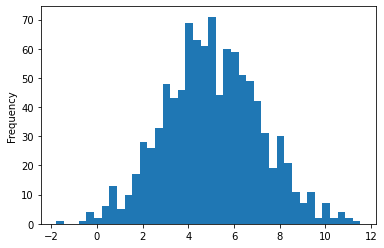

In [4]:
pd.Series(random_normal_5).plot(kind='hist', bins = 40);

In [5]:
random_normal_7 = np.random.normal(5.1, 2, 1000)

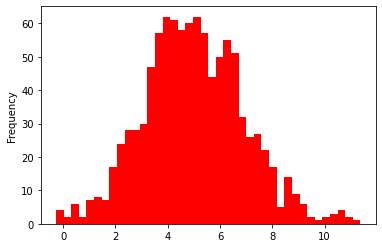

In [6]:
pd.Series(random_normal_7).plot(kind='hist', bins = 40, color='red');

In [7]:
stats.ttest_ind(random_normal_5, random_normal_7)

Ttest_indResult(statistic=0.5027960405259156, pvalue=0.6151630930829528)

In [8]:
np.random.seed(13)
random_bin = np.random.choice([0, 1], size=(100,), p=[0.7, 0.3])

In [9]:
random_bin

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [10]:
stats.binom_test(x=[sum(random_bin), len(random_bin) - sum(random_bin)], p=.1)

3.481426687624852e-07

In [11]:
np.random.seed(21)
random_normal = np.random.normal(18, 20, 100)

In [12]:
stats.ttest_1samp(random_normal, 3.0)

Ttest_1sampResult(statistic=7.974042103707906, pvalue=2.7279794218267574e-12)

In [13]:
np.random.seed(21)
random_normal = np.random.normal(18, 20, 10)

In [14]:
stats.ttest_1samp(random_normal, 7.0)

Ttest_1sampResult(statistic=1.6748822466424407, pvalue=0.12827924668031368)

#### Тесты на нормальность распределения

с их помощью проверяют, пришла ли полученная выборка точек из нормального распределения

In [15]:
np.random.seed(13)
random_normal = np.random.normal(5, 2, 100)
random_uniform = np.random.uniform(0, 1, 100)

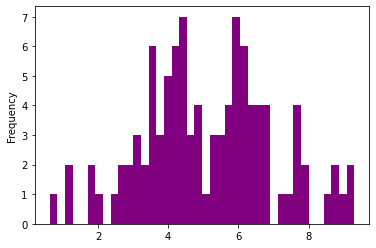

In [16]:
pd.Series(random_normal).plot(kind='hist', bins = 40, color='purple');

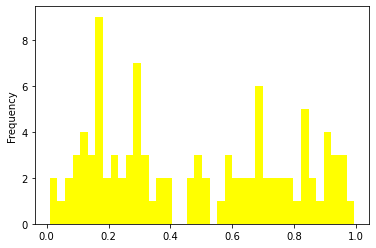

In [17]:
pd.Series(random_uniform).plot(kind='hist', bins = 40, color='yellow');

#### Shapiro-Wilk Test

In [18]:
stats.shapiro(random_normal)

ShapiroResult(statistic=0.9897646903991699, pvalue=0.6455868482589722)

In [19]:
stats.shapiro(random_uniform)

ShapiroResult(statistic=0.9223209619522095, pvalue=1.872835127869621e-05)

#### Kolmogorov-Smirnov Test

In [20]:
stats.kstest(random_normal, 'norm')

KstestResult(statistic=0.933371471007256, pvalue=4.646377515900965e-118)

In [21]:
stats.kstest(random_uniform, 'norm')

KstestResult(statistic=0.5039276991503323, pvalue=4.926235881910341e-24)

Мы видим, что в обоих случаях гипотеза о нормальности распределения отвергается. Почему? Потому что происходит сравнение с нормальным распределением со средним 0 и дисперсией 1. Проверим это, нормализовав входное множество точек.

In [22]:
stats.kstest((random_normal - np.mean(random_normal)) / np.std(random_normal), 'norm')

KstestResult(statistic=0.06562034353090856, pvalue=0.7572142037683822)

#### Excercises

In [23]:
np.random.seed(2)
random_normal = np.random.normal(2, 4, 10)
stats.shapiro(random_normal)

ShapiroResult(statistic=0.9548439383506775, pvalue=0.7258638739585876)

In [24]:
np.random.seed(2)
random_normal = np.random.normal(2, 4, 10)
stats.kstest(random_normal, 'norm')

KstestResult(statistic=0.514185695796664, pvalue=0.005575825333255893)

In [25]:
stats.kstest((random_normal - np.mean(random_normal)) / np.std(random_normal), 'norm')

KstestResult(statistic=0.17907654022324243, pvalue=0.8514658527102467)

### Множественная проверка гипотез

In [26]:
from statsmodels.stats.multitest import multipletests

Сгенерируем p-values и предположим, что мы их получили из множественной проверки гипотез.

In [27]:
np.random.seed(2)
pvals = np.random.uniform(0, 0.3, 100)

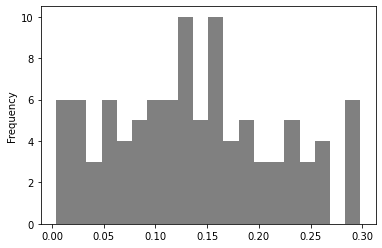

In [28]:
pd.Series(pvals).plot(kind='hist', bins = 20, color='grey');

In [29]:
pvals_corrected = multipletests(pvals, method="holm")

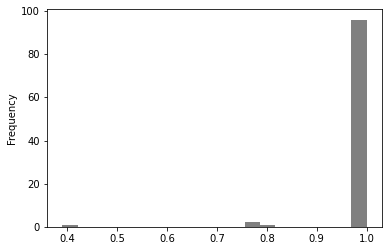

In [30]:
pd.Series(pvals_corrected[1]).plot(kind='hist', bins = 20, color='grey');

### Статистические тесты и бизнес-интерпретация результатов. Практика

Попробуем применить статистические тесты на практике. И сделаем мы это на известном датасете «Титаника»: напомним, что в нём содержатся данные о выживших пассажирах. В центре нашего внимания окажутся некоторые статистически подтверждённые закономерности.

In [31]:
from google.colab import files
import io

In [33]:
df_train = pd.read_csv("train.csv", index_col="PassengerId")
df_test = pd.read_csv("test.csv", index_col="PassengerId")

In [34]:
df_train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [35]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min     

##### Правда ли, что мужчины реже выживали, чем женщины?

In [37]:
male_survived = df_train[df_train['Sex']=='male']['Survived'].sum()
male_num = len(df_train[df_train['Sex']=='male']['Survived'])
female_survived = df_train[df_train['Sex']=='female']['Survived'].sum()
female_num = len(df_train[df_train['Sex']=='female']['Survived'])

In [38]:
print(male_survived / male_num)

0.18890814558058924


In [39]:
print(female_survived / female_num)

0.7420382165605095


In [40]:
proportions_ztest(count=[male_survived, female_survived], nobs=[male_num , female_num])

(-16.218833930670097, 3.7117477701134797e-59)

Мы видим, что есть статистически значимое различие между числом выживших мужчин и женщин. Но наша цель не в том, чтобы зафиксировать наличие различий в уровне выживаемости, а выяснить, выживали ли мужчины реже. У нас есть два варианта: просто посмотреть, где больше выживших с учётом проверенной гипотезы, или провести одностороннюю проверку гипотезы. Последний вариант вполне подходит:

In [41]:
proportions_ztest(count=[male_survived, female_survived], nobs=[male_num , female_num], alternative='smaller')

(-16.218833930670097, 1.8558738850567398e-59)

##### Верно ли, что погибшие в среднем были старше, чем выжившие?

In [42]:
mean_age_survived = df_train[df_train['Survived'] == 1]['Age'].mean()
mean_age_died = df_train[df_train['Survived'] == 0]['Age'].mean()
print(mean_age_survived, mean_age_died)

28.343689655172415 30.62617924528302


In [43]:
df_cleared = df_train.dropna()
survived_ages = df_cleared[df_cleared['Survived']==1]['Age'].values
died_ages = df_cleared[df_cleared['Survived']!=1]['Age'].values
stats.ttest_ind(died_ages, survived_ages, alternative="greater")

Ttest_indResult(statistic=3.53435125095576, pvalue=0.0002594751653940836)

Разобьём возраст на декады и проверим, верно ли, что выживаемость между различными возрастными группами различна. При этом помним, что мы с вами проводим множественную проверку гипотез:

In [44]:
df_cleared['age_group'] = df_cleared['Age'].apply(lambda x: x//10)
df_cleared['age_group']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


PassengerId
2      3.0
4      3.0
7      5.0
11     0.0
12     5.0
      ... 
872    4.0
873    3.0
880    5.0
888    1.0
890    2.0
Name: age_group, Length: 183, dtype: float64

In [45]:
age_groups = df_cleared['age_group'].unique()
age_groups

array([3., 5., 0., 2., 1., 4., 6., 7., 8.])

In [46]:
p_vals = []
coeffs = []

In [48]:
age_group_1_sum = df_cleared[df_cleared['age_group']==age_groups[0]]['Survived'].sum()
age_group_1_sum

37

In [50]:
len(df_cleared[df_cleared['age_group']==age_groups[0]])

49

In [51]:
for i in range(len(age_groups)):
    age_group_1_sum = df_cleared[df_cleared['age_group']==age_groups[i]]['Survived'].sum()
    age_group_1_count = len(df_cleared[df_cleared['age_group']==age_groups[i]])
    for j in range(i+1, len(age_groups)):
        age_group_2_sum = df_cleared[df_cleared['age_group']==age_groups[j]]['Survived'].sum()
        age_group_2_count = len(df_cleared[df_cleared['age_group']==age_groups[j]])
        p_value = proportions_ztest(count=[age_group_1_sum, age_group_2_sum], nobs=[age_group_1_count, age_group_2_count])[1]
        p_vals.append(p_value)
        coeffs.append(age_groups[j])
p_vals_corrected = multipletests(p_vals, method="bonferroni")[1]

In [52]:
for i, pval in enumerate(p_vals_corrected):
    if pval < 0.05:
        print(coeffs[i])

In [53]:
coeffs

[5.0,
 0.0,
 2.0,
 1.0,
 4.0,
 6.0,
 7.0,
 8.0,
 0.0,
 2.0,
 1.0,
 4.0,
 6.0,
 7.0,
 8.0,
 2.0,
 1.0,
 4.0,
 6.0,
 7.0,
 8.0,
 1.0,
 4.0,
 6.0,
 7.0,
 8.0,
 4.0,
 6.0,
 7.0,
 8.0,
 6.0,
 7.0,
 8.0,
 7.0,
 8.0,
 8.0]

!! Таким образом, в итоговую модель целесообразно включать пол и возраст. А добавление возрастных групп, напротив, выглядит сомнительно !!

Какой p-value гипотезы о равенстве среднего возрастов в тренировочной и тестовой выборках? (ответ округлите до двух знаков после запятой)

In [ ]:
train_ages = df_train['Age'].dropna().values
test_ages = df_test['Age'].dropna().values
stats.ttest_ind(train_ages, test_ages)

Ttest_indResult(statistic=-0.5987733746796555, pvalue=0.5494539128955762)

Какой p-value гипотезы о равенстве доли мужчин в тренировочной и тестовой выборках? (ответ округлите до двух знаков после запятой)

In [ ]:
male_train_sum = df_train[df_train.Sex=='male']['Sex'].count()
male_test_sum = df_test[df_test.Sex=='male']['Sex'].count()
sex_train_count = df_train['Sex'].count()
sex_test_count = df_test['Sex'].count()

In [ ]:
proportions_ztest(count=[male_train_sum, male_test_sum], nobs=[sex_train_count, sex_test_count])

(0.39537787824896614, 0.6925640325233131)

In [ ]:
df_test['Sex'].isnull().sum()

0

In [ ]:
df_train[df_train.Sex=='male']['Sex'].count()

577

В первом классе (Pclass) больше мужчины, чем женщин (alpha=0.05)

In [ ]:
sum_male = df_train[(df_train.Pclass==1)&(df_train.Sex=='male')]['Sex'].count()

In [ ]:
sum_female = df_train[(df_train.Pclass==1)&(df_train.Sex=='female')]['Sex'].count()

In [ ]:
sex_count = df_train[(df_train.Pclass==1)]['Sex'].count()

In [ ]:
proportions_ztest(count=[sum_male, sum_female], nobs=[sex_count, sex_count])

(2.6943012562182527, 0.007053637888068598)